In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
import seaborn as sns

from src.IterativeFitting import IterativeFitting as IF
from src.CorrFuncs import covariance_matrix

In [18]:
df = pd.read_excel("SBPvPAD_data.xlsx")

In [19]:
df

,Author,dose,cases,controls,subjects,logOR,low,high,std_error
0,Stoekenbroek,114.0,21.000000,5428.500000,5449.5,0.000,0.0000,0.000,0.000000
1,Stoekenbroek,128.0,39.000000,5410.500000,5449.5,0.410,0.2200,0.590,0.093434
2,Stoekenbroek,139.0,51.000000,5398.500000,5449.5,0.440,0.2700,0.620,0.088384
3,Stoekenbroek,159.0,116.000000,5333.500000,5449.5,1.080,0.9900,1.170,0.045455
4,Itoga,123.9,249.666667,786.333333,1036.0,0.230,0.1600,0.310,0.037879
5,Itoga,129.8,249.666667,2738.333333,2988.0,0.000,0.0000,0.000,0.000000
6,Itoga,134.6,249.666667,6048.333333,6298.0,-0.062,-0.1500,-0.023,0.032071
7,Itoga,139.0,249.666667,9341.333333,9591.0,0.077,0.0004,0.150,0.037778
8,Itoga,143.7,249.666667,8543.333333,8793.0,0.110,0.0220,0.210,0.047475
9,Itoga,149.5,249.666667,4401.333333,4651.0,0.190,0.1100,0.280,0.042929


In [21]:
# Create a function to calculate dose differences
def calculate_dose_diff(study_df):
    reference_dose = study_df.loc[study_df['logOR'] == 0, 'dose'].values[0]
    study_df['doseDiff'] = study_df['dose'] - reference_dose
    return study_df

# Apply the function to each subset of the dataframe
study_df_s = df[df['Author'] == 'Stoekenbroek']
study_df_i = df[df['Author'] == 'Itoga']

study_df_s = calculate_dose_diff(study_df_s)
study_df_i = calculate_dose_diff(study_df_i)

# Concatenate the dataframes back together
df = pd.concat([study_df_s, study_df_i])

# Now define logORslope and std_error_slope using doseDiff
df['logORslope'] = df['logOR'] / df['doseDiff']
df['std_error_slope'] = df['std_error'] / df['doseDiff']

# Display the updated DataFrame
df

#study_df.iloc[0,5:8] = np.log(study_df.iloc[0,5:8].to_numpy().astype(np.float64))
#study_df.iloc[5,5:8] = np.log(study_df.iloc[5,5:8].to_numpy().astype(np.float64))
#study_df['logORslope'] = study_df['logOR'] / study_df['dose']
#study_df['std_error_slope'] = study_df['std_error'] / study_df['dose']
#study_df

/var/folders/rw/bvs28fcj1dn9k_r_cs5r83sm0000gp/T/ipykernel_21382/3730565077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_df['doseDiff'] = study_df['dose'] - reference_dose


,Author,dose,cases,controls,subjects,logOR,low,high,std_error,doseDiff,logORslope,std_error_slope
0,Stoekenbroek,114.0,21.000000,5428.500000,5449.5,0.000,0.0000,0.000,0.000000,0.0,NaN,NaN
1,Stoekenbroek,128.0,39.000000,5410.500000,5449.5,0.410,0.2200,0.590,0.093434,14.0,0.029286,0.006674
2,Stoekenbroek,139.0,51.000000,5398.500000,5449.5,0.440,0.2700,0.620,0.088384,25.0,0.017600,0.003535
3,Stoekenbroek,159.0,116.000000,5333.500000,5449.5,1.080,0.9900,1.170,0.045455,45.0,0.024000,0.001010
4,Itoga,123.9,249.666667,786.333333,1036.0,0.230,0.1600,0.310,0.037879,-5.9,-0.038983,-0.006420
5,Itoga,129.8,249.666667,2738.333333,2988.0,0.000,0.0000,0.000,0.000000,0.0,NaN,NaN
6,Itoga,134.6,249.666667,6048.333333,6298.0,-0.062,-0.1500,-0.023,0.032071,4.8,-0.012917,0.006681
7,Itoga,139.0,249.666667,9341.333333,9591.0,0.077,0.0004,0.150,0.037778,9.2,0.008370,0.004106
8,Itoga,143.7,249.666667,8543.333333,8793.0,0.110,0.0220,0.210,0.047475,13.9,0.007914,0.003415
9,Itoga,149.5,249.666667,4401.333333,4651.0,0.190,0.1100,0.280,0.042929,19.7,0.009645,0.002179


In [24]:
# Create a subset of the DataFrame where logORslope != 0
subset_df = df[df['doseDiff'] != 0]

# Calculate the weights as the inverse of the variances
weights = 1 / (subset_df['std_error_slope'] ** 2)

# Calculate the weighted mean of logORslope
weighted_sum = np.sum(weights * subset_df['logORslope'])
sum_of_weights = np.sum(weights)
mean_logORslope = weighted_sum / sum_of_weights
print(" mean of logORslope:", mean_logORslope)

 mean of logORslope: 0.018560095362731444


In [25]:
subset_df

,Author,dose,cases,controls,subjects,logOR,low,high,std_error,doseDiff,logORslope,std_error_slope
1,Stoekenbroek,128.0,39.000000,5410.500000,5449.5,0.410,0.2200,0.590,0.093434,14.0,0.029286,0.006674
2,Stoekenbroek,139.0,51.000000,5398.500000,5449.5,0.440,0.2700,0.620,0.088384,25.0,0.017600,0.003535
3,Stoekenbroek,159.0,116.000000,5333.500000,5449.5,1.080,0.9900,1.170,0.045455,45.0,0.024000,0.001010
4,Itoga,123.9,249.666667,786.333333,1036.0,0.230,0.1600,0.310,0.037879,-5.9,-0.038983,-0.006420
6,Itoga,134.6,249.666667,6048.333333,6298.0,-0.062,-0.1500,-0.023,0.032071,4.8,-0.012917,0.006681
7,Itoga,139.0,249.666667,9341.333333,9591.0,0.077,0.0004,0.150,0.037778,9.2,0.008370,0.004106
8,Itoga,143.7,249.666667,8543.333333,8793.0,0.110,0.0220,0.210,0.047475,13.9,0.007914,0.003415
9,Itoga,149.5,249.666667,4401.333333,4651.0,0.190,0.1100,0.280,0.042929,19.7,0.009645,0.002179


In [30]:
# Filter the DataFrame for each author
df_s = df[df['Author'] == 'Stoekenbroek']
df_i = df[df['Author'] == 'Itoga']
df_i = study_df_i.sort_values(by='std_error').reset_index(drop=True)
# Display the DataFrames to verify
print("Study DataFrame for Stoekenbroek:\n", df_s)
print("\nStudy DataFrame for Itoga:\n", df_i)

Study DataFrame for Stoekenbroek:
          Author   dose  cases  controls  subjects  logOR   low  high  \
0  Stoekenbroek  114.0   21.0    5428.5    5449.5   0.00  0.00  0.00   
1  Stoekenbroek  128.0   39.0    5410.5    5449.5   0.41  0.22  0.59   
2  Stoekenbroek  139.0   51.0    5398.5    5449.5   0.44  0.27  0.62   
3  Stoekenbroek  159.0  116.0    5333.5    5449.5   1.08  0.99  1.17   

   std_error  doseDiff  logORslope  std_error_slope  
0   0.000000       0.0         NaN              NaN  
1   0.093434      14.0    0.029286         0.006674  
2   0.088384      25.0    0.017600         0.003535  
3   0.045455      45.0    0.024000         0.001010  

Study DataFrame for Itoga:
   Author   dose       cases     controls  subjects  logOR     low   high  \
0  Itoga  129.8  249.666667  2738.333333    2988.0  0.000  0.0000  0.000   
1  Itoga  134.6  249.666667  6048.333333    6298.0 -0.062 -0.1500 -0.023   
2  Itoga  139.0  249.666667  9341.333333    9591.0  0.077  0.0004  0.150   
3

In [31]:
# Function to calculate the covariance matrix
def calculate_covariance_matrix(study_df):
    Nx = study_df["subjects"].to_numpy().astype(np.float64)
    Lx = study_df["logORslope"].to_numpy().astype(np.float64)[1:]
    M1x = np.sum(study_df["cases"].to_numpy().astype(np.float64))
    A0 = M1x * Nx[1:] / (Nx.sum())
    
    it_fit_ex = IF(Lx, A0, Nx, M1x)
    A, B, a0, b0 = it_fit_ex.convexProgram()
    C = covariance_matrix(A, B, a0, b0, study_df["std_error_slope"].to_numpy()[1:]**2)
    
    return C

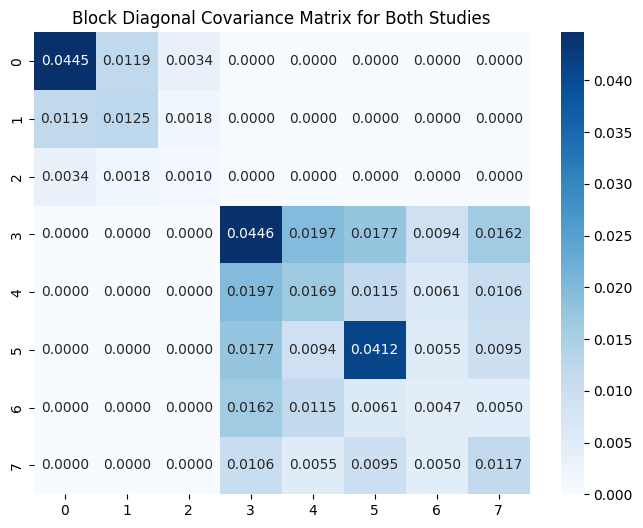

In [59]:
# Calculate covariance matrices for both study dataframes
cov_matrix_s = calculate_covariance_matrix(df_s)
cov_matrix_i = calculate_covariance_matrix(df_i)

# Create the block diagonal covariance matrix
cov_matrix_block = block_diag(cov_matrix_s, cov_matrix_i)




# Function to plot the heatmap of a covariance matrix
def plot_covariance_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt=".4f", cmap="Blues", cbar=True)
    plt.title(title)
    plt.show()

# Plot the heatmaps
plot_covariance_matrix(1000*cov_matrix_block, "Block Diagonal Covariance Matrix for Both Studies")

In [60]:
# Create 'small' dataframes by removing rows where std_error_slope == 0
small_df_s = df_s[df_s['doseDiff'] != 0]
small_df_i = df_i[df_i['doseDiff'] != 0]

# Combine logORslope from the 'small' dataframes
logORslope_combined = np.concatenate([small_df_s['logORslope'].to_numpy(), small_df_i['logORslope'].to_numpy()])

# Compute the inverse of the block diagonal covariance matrix
cov_matrix_block_inv = np.linalg.inv(cov_matrix_block)

# Compute the ones vector
ones_vector = np.ones(len(logORslope_combined))

# Compute (1^T \Sigma^{-1} 1)^{-1} 1^T \Sigma^{-1} logORslopes
term1 = ones_vector.T @ cov_matrix_block_inv @ ones_vector
term2 = ones_vector.T @ cov_matrix_block_inv @ logORslope_combined
weighted_mean_logORslope = term2 / term1

print("Weighted mean of logORslope with block diagonal covariance matrix:", weighted_mean_logORslope)

Weighted mean of logORslope with block diagonal covariance matrix: 0.02180181167466494


In [77]:
# Compute the least squares estimates for each study
def compute_weighted_mean_logORslope(small_df, cov_matrix):
    logORslope = small_df['logORslope'].to_numpy()
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    ones_vector = np.ones(len(logORslope))

    term1 = ones_vector.T @ cov_matrix_inv @ ones_vector
    term2 = ones_vector.T @ cov_matrix_inv @ logORslope
    weighted_mean_logORslope = term2 / term1

    return weighted_mean_logORslope

weighted_mean_logORslope_s_d = compute_weighted_mean_logORslope(small_df_s, np.diag(np.diag(cov_matrix_s)))
weighted_mean_logORslope_i_d = compute_weighted_mean_logORslope(small_df_i, np.diag(np.diag(cov_matrix_i)))

weighted_mean_logORslope_s = compute_weighted_mean_logORslope(small_df_s, cov_matrix_s)
weighted_mean_logORslope_i = compute_weighted_mean_logORslope(small_df_i, cov_matrix_i)


print("full cov mean of logORslope for Stoekenbroek:", weighted_mean_logORslope_s)
print("full cov mean of logORslope for Itoga:", weighted_mean_logORslope_i)
print("diag cov mean of logORslope for Stoekenbroek:", weighted_mean_logORslope_s_d)
print("diag cov mean of logORslope for Itoga:", weighted_mean_logORslope_i_d)




full cov mean of logORslope for Stoekenbroek: 0.023945268733060767
full cov mean of logORslope for Itoga: 0.014610895335933105
diag cov mean of logORslope for Stoekenbroek: 0.02363661982323989
diag cov mean of logORslope for Itoga: 0.004898756562797418


In [74]:
def slope_fn(beta,x):
    return beta*(x-115)

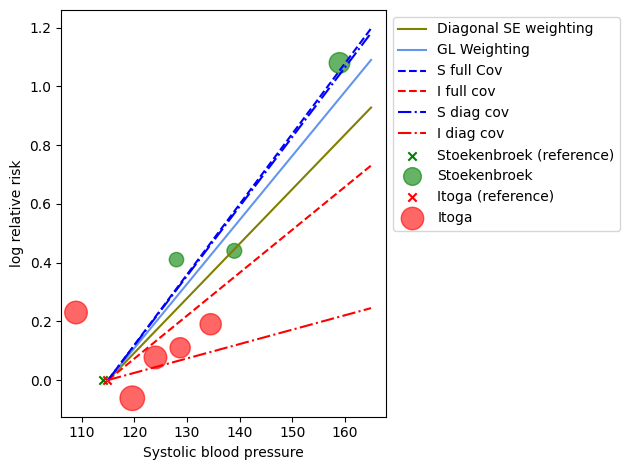

In [76]:
# Define the x range for plotting
x = np.linspace(115, 165)

# Plot the lines
plt.plot(x, slope_fn(mean_logORslope, x), label="Diagonal SE weighting", c="olive")
#plt.fill_between(x, slope_fn(low_beta_s, x), slope_fn(high_beta_s, x), alpha=0.3, color="olive")
plt.plot(x, slope_fn(weighted_mean_logORslope, x), label="GL Weighting", c="cornflowerblue")
#plt.fill_between(x, slope_fn(low_beta_s_GL, x), slope_fn(high_beta_s_GL, x), alpha=0.3, color="cornflowerblue")

# Plot the new lines for individual datasets
plt.plot(x, slope_fn(weighted_mean_logORslope_s, x), label="S full Cov", linestyle='dashed', color='blue')
plt.plot(x, slope_fn(weighted_mean_logORslope_i, x), label="I full cov", linestyle='dashed', color='red')

# Plot the new lines for individual datasets
plt.plot(x, slope_fn(weighted_mean_logORslope_s_d, x), label="S diag cov", linestyle='-.', color='blue')
plt.plot(x, slope_fn(weighted_mean_logORslope_i_d, x), label="I diag cov", linestyle='-.', color='red')




# Plot the data points using study_df
authors = df['Author'].unique()
colors = ['green', 'red']

for author, color in zip(authors, colors):
    author_df = df[df['Author'] == author]
    # Plot x's for std_error == 0
    std_error_zero = author_df[author_df['std_error'] == 0]
    
    if author == "Itoga":
        # Shift doses to the left by 15 units for "Itoga"
        std_error_zero_dose_shifted = std_error_zero['dose'] - 15
        std_error_nonzero_dose_shifted = author_df[author_df['std_error'] != 0]['dose'] - 15
    else:
        std_error_zero_dose_shifted = std_error_zero['dose']
        std_error_nonzero_dose_shifted = author_df[author_df['std_error'] != 0]['dose']
    
    plt.scatter(std_error_zero_dose_shifted, std_error_zero['logOR'], c=color, marker='x', label=f'{author} (reference)')
    
    # Plot dots scaled inversely with std_error
    std_error_nonzero = author_df[author_df['std_error'] != 0]
    sizes = 1 / std_error_nonzero['std_error']  # Inverse of std_error
    plt.scatter(std_error_nonzero_dose_shifted, std_error_nonzero['logOR'], c=color, s=sizes*10, alpha=0.6, label=author)

# Add labels and legend
plt.ylabel("log relative risk")
plt.xlabel("Systolic blood pressure")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()